In [587]:
import pandas as pd
import numpy as np
import random
import math
import gc
import matplotlib.pylab as plt
import networkx as nx

In [588]:
nodes = 250

In [589]:
adjacency_matrix = np.zeros((nodes,nodes),dtype = np.int)
adjacency_matrix.shape

(250, 250)

In [590]:
edge_probability = .0085

In [591]:
edges = []
edges_cnt = 0
for i in range(nodes):
    for j in range(i):
        prob = random.random()
        if prob < edge_probability:
            adjacency_matrix[i,j] = 1
            edges.append((i,j))
            edges_cnt += 1

In [592]:
adjacency_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [593]:
print(edges[:10])
print("Number of edges {}".format(edges_cnt))

[(18, 9), (21, 2), (30, 25), (38, 1), (40, 29), (42, 14), (44, 33), (45, 44), (48, 5), (53, 39)]
Number of edges 256


In [594]:
G=nx.Graph()
G.add_nodes_from(list(range(0,nodes)))
G.add_edges_from(edges)

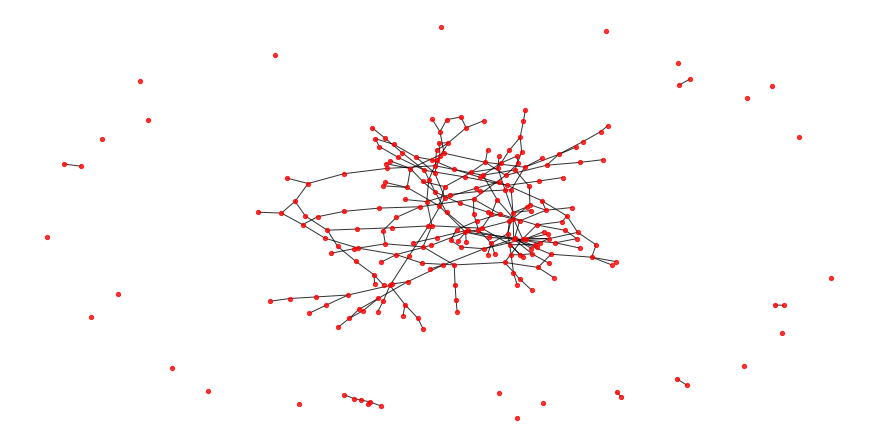

In [617]:
plt.figure(figsize=(12,6))
nx.draw(G,node_color='r', node_size=18, alpha=0.8)
plt.show() # display

In [596]:
#Vertex Cover Greedy Algorithm
visited = np.zeros(nodes)
cnt = 0
for e in edges:
    (u,v) = e
#     print(u,v)
    if ((visited[u]==0) & (visited[v]==0)):
        visited[u] = 1
        visited[v] = 1
        cnt+=2

In [597]:
print("Vertex cover consists of {} nodes".format(cnt))

Vertex cover consists of 178 nodes


In [743]:
approximation_algo_result = cnt
approximation_algo_result

178

In [751]:
n = nodes
pop_total = int(50 * max(1,round(n/5.0))) # max population allowed in the environment
pop_init = int(20 * max(1,round(n/5.0)))
max_iterate = int(7 * max(1,round(n/5.0)))

In [752]:
print("N = {}\nPopulation Total = {}\nPopulation Initial = {}\nMax Iteration = {}\n".format(n,pop_total,pop_init,max_iterate))

N = 250
Population Total = 2500
Population Initial = 1000
Max Iteration = 350



In [600]:
def chromosomes_gen(n,k,pop_init):
    lst = []
    for i in range(pop_init):
        chromosome = np.zeros(n,dtype= int)
        samples = random.sample(range(0,n), k = k)
        for j in range(k):
            chromosome[samples[j]] = 1
#         print(chromosome)
        lst.append(chromosome)
    return lst

In [601]:
def cost(cmbn,n,edges):
    obstacles = 0
    for e in edges:
        (u,v) = e
        if ((cmbn[u]==0) & (cmbn[v]==0)):
            obstacles += 1
    return obstacles

In [602]:
def selection(lst,pop_total,n,edges):
    score = []
    output_lst = []
    len_lst = len(lst)
    for i in range(len_lst):
        score.append(cost(lst[i],n,edges))
    sorted_index = np.argsort(score)
    cnt = 0
    for i in range(len_lst):
        output_lst.append(lst[sorted_index[i]])
        if((i+1) == pop_total):
            break
    lst = output_lst
    return lst,score[sorted_index[0]]

In [666]:
def helper_print(lst,n):
    res = []
    for i in range(n):
        if lst[i] == 1:
            res.append(i)
    print(res)

In [816]:
def cross_over_mutate_extended(lst,n,k,mutat_prob,pop_total,edges):
    new_lst = lst.copy()
    len_lst = len(lst)
    cross_over_prob = 0.50
    mutat_prob = 0.05
    variations = 1
    
    
    #Crossover
    for i in range(len_lst):
        for v in range(variations):
            tmp = lst[i].copy()

            mate_with = lst[int(random.uniform(0,len_lst))]

            tmp_unique = []
            mate_with_unique = []

            for j in range(n):
                if(tmp[j]==1):
                    tmp_unique.append(j)
                if(mate_with[j]==1):
                    mate_with_unique.append(j)

            tmp_unique = np.setdiff1d(tmp,mate_with)
            random.shuffle(tmp_unique)
            mate_with_unique = np.setdiff1d(mate_with,tmp)
            random.shuffle(mate_with_unique)

            swap = math.ceil(cross_over_prob * min(len(tmp_unique),len(mate_with_unique)))

            for j in range(swap):
                tmp[mate_with_unique[j]] = 1
                tmp[tmp_unique[j]] = 0

            # Mutation 
            zeroes = []
            ones = []
            for j in range(n):
                if tmp[j]==1:
                    ones.append(j)
                else:
                    zeroes.append(j)
            
            random.shuffle(ones)
            random.shuffle(zeroes)

            coin_toss = random.random()
            if(coin_toss <= 0.5):
                swaps = min(len(ones),len(zeroes))

                for j in range(swaps):
                    coin_toss2 = random.random()
                    if(coin_toss2 < mutat_prob):
                        tmp[ones[j]] = 0
                        tmp[zeroes[j]] = 1
                        #Swapping logic
                        dummy = ones[j]
                        ones[j] = zeroes[j]
                        zeroes[j] = dummy
            else:    
                
                mutate_lst = []
                for e in edges:
                    (u,v) = e
                    if((tmp[u] == 0) & (tmp[v] == 0)):
                        coin_toss2 = random.random()
                        if(coin_toss2 < mutat_prob):
                            coin_toss3 = random.random()
                            if(coin_toss3 <= 0.5):
                                if(u not in mutate_lst):
                                    mutate_lst.append(u)
                            else:
                                if(v not in mutate_lst):
                                    mutate_lst.append(v)

                random.shuffle(mutate_lst)
                sz = min(len(ones),len(mutate_lst))
                
                for j in range(sz):
                    tmp[ones[j]] = 0
                    tmp[mutate_lst[j]] = 1
                    #Swapping logic
                    dummy = ones[j]
                    ones[j] = mutate_lst[j]
                    mutate_lst[j] = dummy
                
            new_lst.append(tmp)
    
    return new_lst

In [810]:
def environment(n,k,mutat_prob,pop_init,pop_total,max_iterate,edges):
    lst = chromosomes_gen(n,k,pop_init)
    for it in range(max_iterate):
        lst = cross_over_mutate_extended(lst,n,k,mutat_prob,pop_total,edges)
#         return
        lst,cost_value = selection(lst,pop_total,n,edges)
        if (it%10)==9:
            print("k = {}, Iteration = {}, Cost = {}".format(k,it+1,cost_value))
        if cost_value==0:
            break
    result = []
    soln = lst[0]
    for j in range(len(soln)):
        if(soln[j] == 1):
            result.append(j)
    print("k = {}, Iteration = {}, Cost = {}\nSoln = {}".format(k,it,cost_value,result))
    return cost_value,result

In [811]:
def free_memory():
    gc.collect()

In [812]:
def mfind(n,mutat_prob,pop_init,pop_total,max_iterate,edges,start,end):
    result_dict = {}
    l = start
    h = end
    ans = 0
    while(l<=h):
        m = int((l+h)/2.0)
        cost_value,result = environment(n,m,mutat_prob,pop_init,pop_total,max_iterate,edges)
#         print("Cost is {} result is {}".format(cost_value,result))
        if(cost_value==0):
            result_dict[m] = result
            h = m-1
        else:
            l = m + 1
    return result_dict

In [815]:
free_memory()
%time result = mfind(n,mutat_prob,pop_init,pop_total,max_iterate,edges,int(approximation_algo_result/2),n)



k = 169, Iteration = 10, Cost = 5
k = 169, Iteration = 20, Cost = 2
k = 169, Iteration = 25, Cost = 0
Soln = [0, 1, 2, 4, 5, 6, 8, 10, 11, 13, 16, 18, 23, 24, 25, 26, 27, 28, 29, 31, 34, 35, 37, 38, 39, 41, 42, 43, 44, 45, 47, 51, 53, 54, 55, 57, 58, 60, 61, 62, 64, 65, 66, 67, 68, 70, 72, 73, 74, 75, 76, 79, 80, 81, 82, 84, 86, 87, 89, 92, 93, 94, 95, 99, 100, 101, 102, 104, 107, 109, 110, 111, 114, 116, 118, 119, 120, 121, 124, 125, 126, 127, 129, 130, 131, 135, 136, 138, 139, 141, 142, 144, 145, 146, 147, 148, 151, 152, 153, 154, 155, 156, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 174, 179, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 220, 222, 223, 224, 225, 227, 228, 229, 230, 232, 234, 235, 236, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249]
k = 128, Iteration = 10, Cost = 27
k = 128, Iteration = 20, Cost = 19
k = 128, Iteration = 30, Cost = 12
k = 128, It

In [817]:
result.keys()

dict_keys([169, 128, 108, 105, 104])